In [1]:
# Read data 
# Eplore and clean up the data to have accurate and size 
# Process data and ensure there no skewed data 
# Engineer new possible feature 
# Split data for train and test 
# Scale data for better processing 
# Train with Linear Model
# Train with RandomForestRegressor

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Total bedroom has less row than others so we need to remove excess rows from others 
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Performing one hot encoding on columns with non-numerics and drop such column 
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int))
data = data.drop(['ocean_proximity'], axis=1)

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [9]:
data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

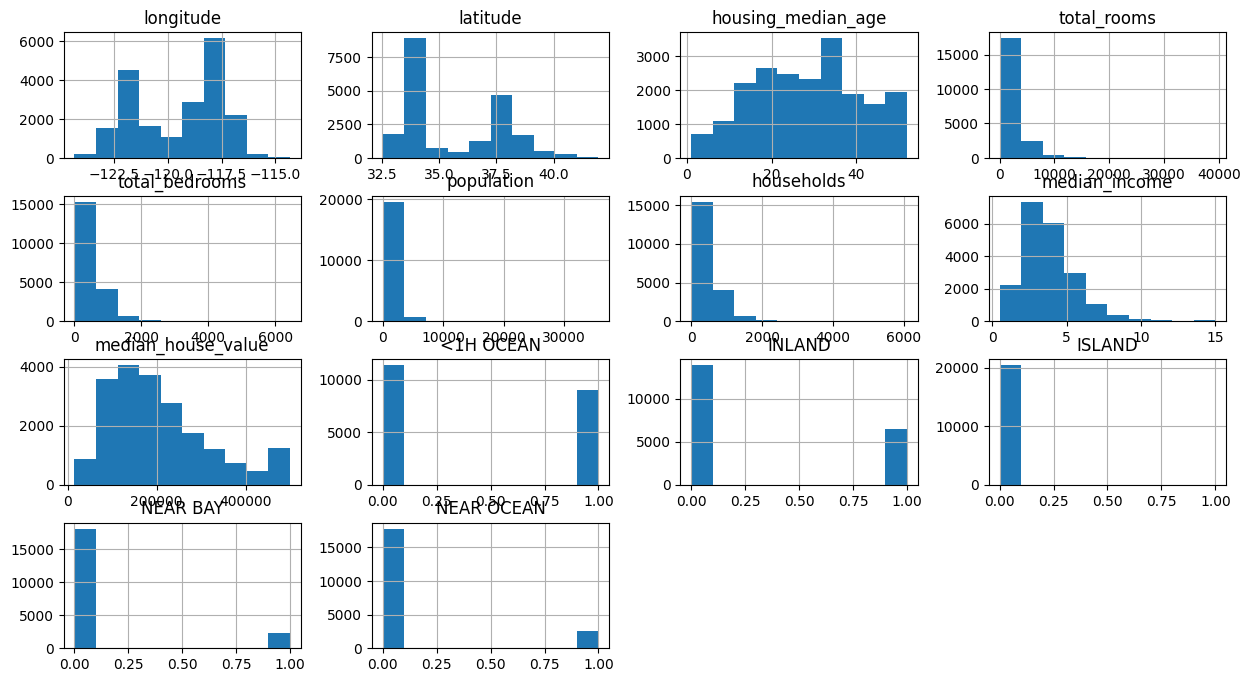

In [10]:
data.hist(figsize=(15,8))

<Axes: >

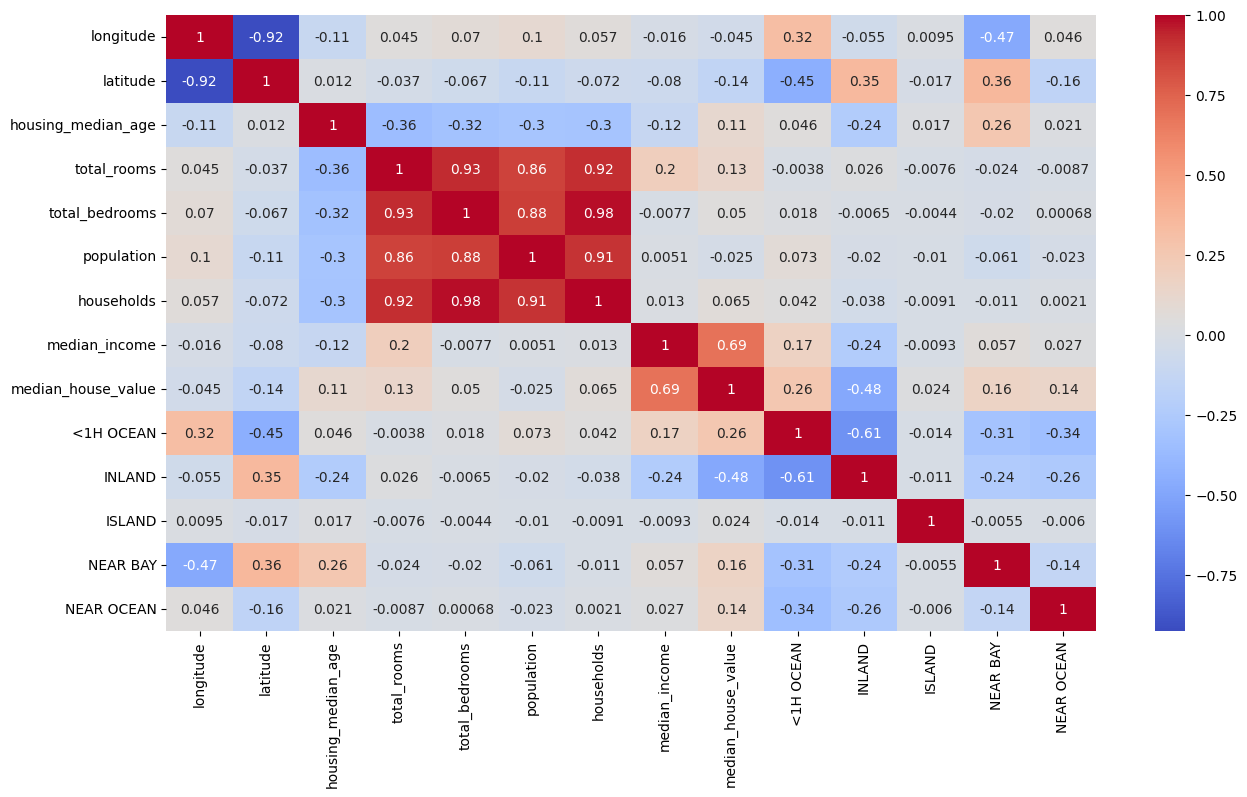

In [11]:
plt.figure(figsize=(15,8))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

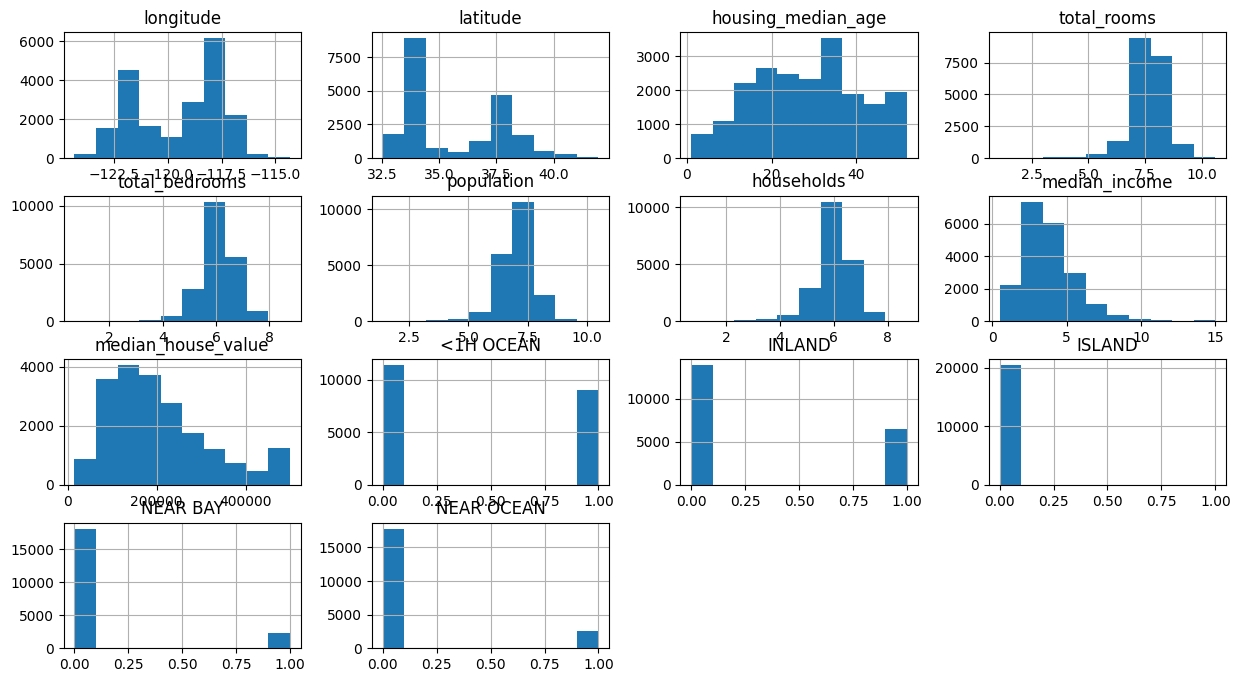

In [12]:
# Make skewed data binomial looking distributed

#total_rooms, total_bedrooms, population, households

data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

data.hist(figsize=(15,8))

# from pandas import DataFrame
# a = DataFrame(data=data['ISLAND'])
# a = a.join(data['INLAND'])
# a = np.log(a+1)
# a.hist(figsize=(15,8))
# a

<Axes: >

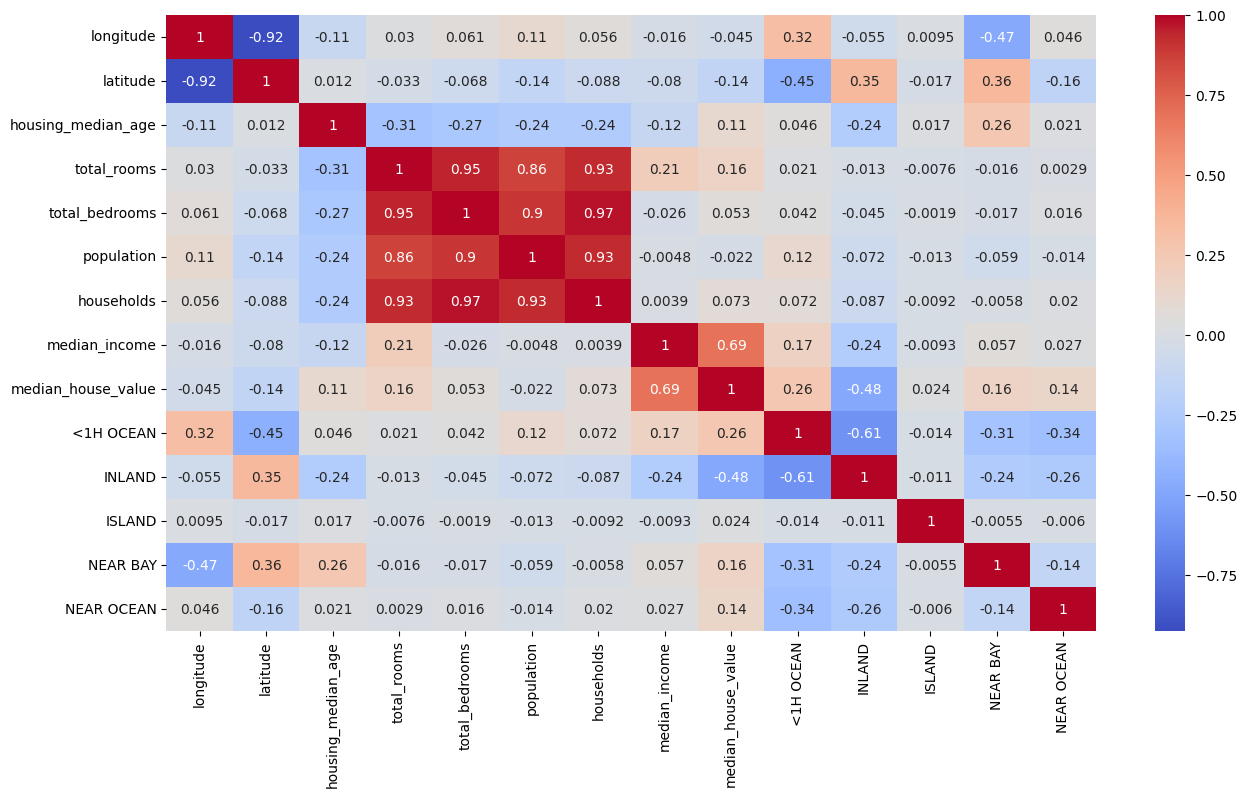

In [13]:
plt.figure(figsize=(15,8))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm")

<Axes: >

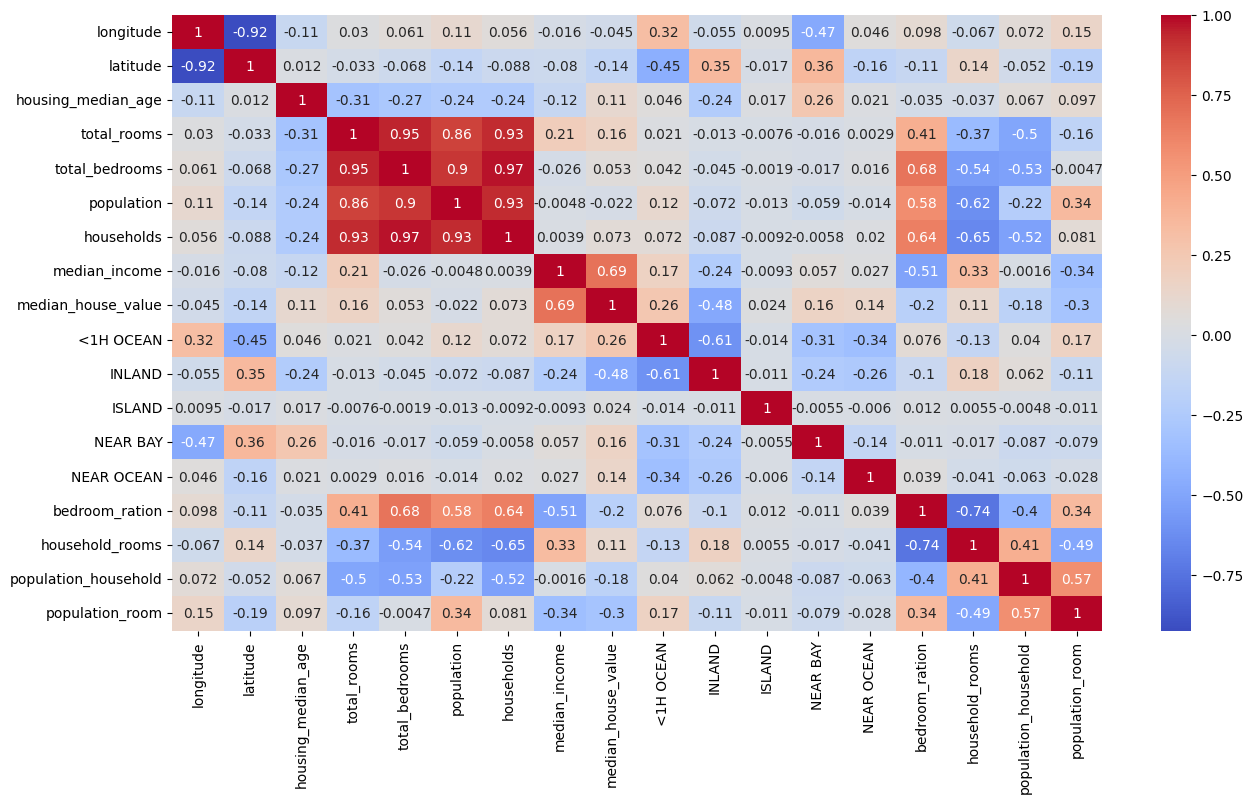

In [14]:
# Engineering new features

data['bedroom_ration'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']
data['population_household'] = data['population'] / data['households']
data['population_room'] = data['population'] / data['total_rooms']

plt.figure(figsize=(15,8))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [15]:
# Split data into test and train data 

from sklearn.model_selection import train_test_split

# Split data into X - the data we are using and y the column we are predicting
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
train_data = X_train.join(y_train)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms,population_household,population_room,median_house_value
4682,-118.35,34.08,52.0,7.964851,6.582025,7.079184,6.558198,3.2645,1,0,0,0,0,0.826384,1.214488,1.079441,0.888803,175000.0
20571,-121.99,38.53,6.0,8.433594,6.727432,7.848543,6.700731,3.4186,0,1,0,0,0,0.797695,1.258608,1.171297,0.930629,127300.0
16124,-122.47,37.78,52.0,7.877018,6.376727,7.172425,6.359574,3.7292,0,0,0,1,0,0.809536,1.238608,1.127815,0.910551,416700.0
10294,-117.80,33.87,16.0,8.691986,7.156177,8.041735,7.098376,4.2566,1,0,0,0,0,0.823307,1.224504,1.132898,0.925190,206100.0
1630,-122.17,37.88,32.0,8.198089,6.232448,7.239933,6.228511,7.6917,0,0,0,1,0,0.760232,1.316220,1.162386,0.883124,401800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,-122.31,37.56,40.0,7.209340,5.802118,6.553933,5.697093,3.3200,0,0,0,0,1,0.804806,1.265442,1.150399,0.909089,292900.0
10827,-117.92,33.68,28.0,8.130942,6.393591,7.242798,6.329721,4.8125,1,0,0,0,0,0.786328,1.284566,1.144252,0.890770,244600.0
15429,-117.24,33.21,18.0,7.521318,6.040255,7.366445,5.961005,3.0982,1,0,0,0,0,0.803085,1.261753,1.235772,0.979409,111300.0
8855,-118.38,34.07,48.0,7.937375,6.391917,7.119636,6.331502,4.4896,1,0,0,0,0,0.805294,1.253632,1.124478,0.896976,500001.0


<Axes: xlabel='latitude', ylabel='longitude'>

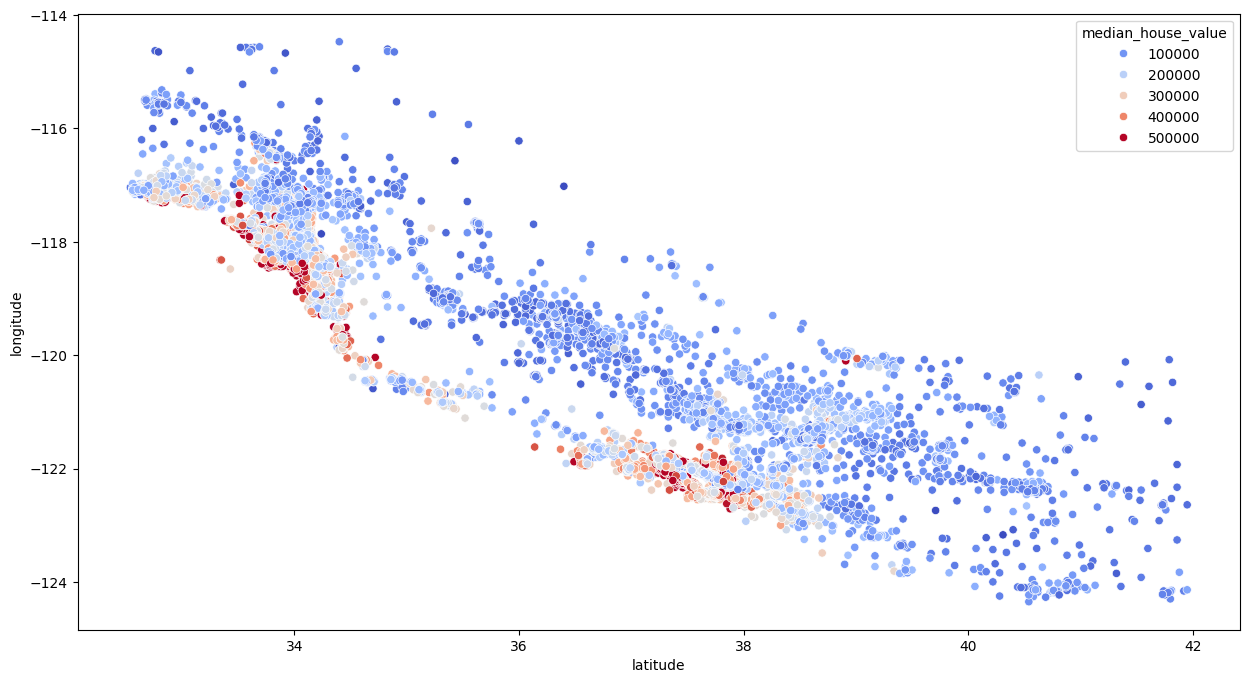

In [19]:
plt.figure(figsize=(15,8))
sb.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [20]:
# LinearRegression model training

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
reg.score(X_test, y_test)

0.6741966847615822

In [22]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
forest.score(X_test, y_test)

0.8199593165755811

In [32]:
# Hyperparameter tunning with RandomGridSearch

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [200, 300, 400],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8],
    "warm_start": [False, True]
}

gridSearchCV = GridSearchCV(
    forest, param_grid, 
    scoring="neg_mean_squared_error", 
    n_jobs=-1, # refit=True, 
    cv=5, #verbose=0, pre_dispatch='2*n_jobs', error_score=nan, 
    return_train_score=True)

gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [200, 300, 400],
                         'warm_start': [False, True]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
# gridSearchCV.best_estimator_

RandomForestRegressor(n_estimators=300)

In [31]:
gridSearchCV.best_estimator_.score(X_test, y_test)

0.8217201498981797